##  Linear Discriminant Analysis (LDA)
The most used dimensionaly reduction method
[lecture link](https://sebastianraschka.com/Articles/2014_python_lda.html#sections)

* Compute the d-dimensional mean vectors for the different classes from the dataset.
* Compute the scatter matrices (in-between-class and within-class scatter matrix).
* Compute the eigenvectors (ee1,ee2,...,eed
) and corresponding eigenvalues (λλ1,λλ2,...,λλd
) for the scatter matrices.
* Sort the eigenvectors by decreasing eigenvalues and choose k
eigenvectors with the largest eigenvalues to form a d×k dimensional matrix WW
(where every column represents an eigenvector).
* Use this d×k
eigenvector matrix to transform the samples onto the new subspace. This can be summarized by the matrix multiplication: YY=XX×WW (where XX is a n×d-dimensional matrix representing the n samples, and yy are the transformed n×k-dimensional samples in the new subspace).

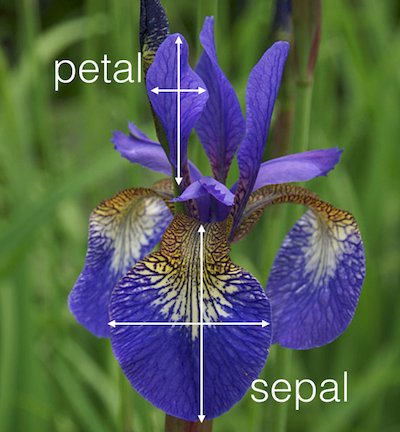!

In [1]:
feature_dict = {i:label for i,label in zip(
                range(4),
                  ('sepal length in cm',
                  'sepal width in cm',
                  'petal length in cm',
                  'petal width in cm', ))}


In [2]:
import pandas as pd

df = pd.io.parsers.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',',
    )
df.columns = [l for i,l in sorted(feature_dict.items())] + ['class label']
df.dropna(how="all", inplace=True) # to drop the empty line at file-end

df.tail()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class label
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [4]:
from sklearn.preprocessing import LabelEncoder

X = df.drop(['class label'], axis=1).values
y = df['class label'].values

enc = LabelEncoder()
label_encoder = enc.fit(y)
y = label_encoder.transform(y) + 1

label_dict = {1: 'Setosa', 2: 'Versicolor', 3:'Virginica'}
